In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scripts import bookdatafunctions as bdf
from pprint import pprint
from collections import Counter

In [4]:
DATA_FILE_AGES = "Data/FCBLex_data_output_ages.xlsx"
DATA_FILE_GROUPS = "Data/FCBLex_data_output_groups.xlsx"
DATA_FILE_WHOLE = "Data/FCBLex_data_output_whole.xlsx"
SHEET_NAMES_AGES = ['5','6','7','8','9','10','11','12','13','14','15']
SHEET_NAMES_GROUPS = ['7-8','9-12','13+']
WHOLE = ['Whole']
UPOS_TAGS = {'ADJ','ADP','ADV','AUX','CCONJ','INTJ','NOUN','NUM','PRON','PROPN','PUNCT','SCONJ','SYM','VERB'}

In [5]:
dfs_ages = {}
with pd.ExcelFile(DATA_FILE_AGES) as xlsx:
    for sheet in SHEET_NAMES_AGES:
        dfs_ages[sheet] = xlsx.parse(sheet)
dfs_groups = {}
with pd.ExcelFile(DATA_FILE_GROUPS) as xlsx:
    for sheet in SHEET_NAMES_GROUPS:
        dfs_groups[sheet] = xlsx.parse(sheet)
dfs_whole = {}
with pd.ExcelFile(DATA_FILE_WHOLE) as xlsx:
        for sheet in WHOLE:
            dfs_whole[sheet] = xlsx.parse(sheet)

In [6]:
print(list(dfs_ages.values())[0].columns)

Index(['text', 'lemma', 'upos', 'Word-POS F', 'Word F', 'Word CD', 'Word D',
       'Word U', 'Word SFI', 'Word Zipf', 'Lemma F', 'Lemma CD', 'Lemma D',
       'Lemma U', 'Lemma SFI', 'Lemma Zipf', 'Lemma IFS', 'Word FSA',
       'Lemma FSA'],
      dtype='object')


In [72]:
def formatDataForTable2(dfs, names):
    returnable = {}
    word_amounts = {sheet:dfs[sheet].drop_duplicates(['text','upos'])['Word-POS Frequency'].sum() for sheet in names}
    word_types = {sheet:len(dfs[sheet]['text'].drop_duplicates()) for sheet in names}
    hapax_words = {sheet:len(dfs[sheet][dfs[sheet]['Word Frequency'] == 1]) for sheet in names}
    lemma_types = {sheet:len(dfs[sheet]['lemma'].drop_duplicates()) for sheet in names}
    for sheet in names:
        returnable[sheet] = "Age "+str(sheet)+" & "+str(word_amounts[sheet])+" & "+str(word_types[sheet])+" & "+str(hapax_words[sheet])+" & "+str(lemma_types[sheet])+" \\\\"
    return returnable

In [73]:
temp = list(formatDataForTable2(dfs_ages, SHEET_NAMES_AGES).values())
#temp.sort()
for i in temp:
    print(i)

Age 5 & 265357 & 52041 & 34771 & 23724 \\
Age 6 & 296637 & 49063 & 30892 & 20314 \\
Age 7 & 493270 & 77006 & 48667 & 32845 \\
Age 8 & 527536 & 72748 & 45075 & 30501 \\
Age 9 & 1691753 & 161215 & 95163 & 61473 \\
Age 10 & 479257 & 71472 & 44926 & 29294 \\
Age 11 & 182147 & 31771 & 20038 & 13473 \\
Age 12 & 1383606 & 144525 & 87717 & 55170 \\
Age 13 & 770544 & 107640 & 67269 & 43497 \\
Age 14 & 1323202 & 150524 & 91729 & 59678 \\
Age 15 & 1111343 & 136365 & 84628 & 54387 \\


In [75]:
temp = list(formatDataForTable2(dfs_groups, SHEET_NAMES_GROUPS).values())
#temp.sort()
for i in temp:
    print(i)

Age 7-8 & 1582800 & 171260 & 104507 & 70358 \\
Age 9-12 & 3736763 & 280798 & 163700 & 106070 \\
Age 13+ & 3205089 & 278350 & 165362 & 108088 \\


In [74]:
temp = list(formatDataForTable2(dfs_whole, WHOLE).values())
#temp.sort()
for i in temp:
    print(i)

Age Whole & 8524652 & 516595 & 299863 & 203054 \\


In [65]:
pprint(formatDataForTable2(dfs_groups, SHEET_NAMES_GROUPS), sort_dicts=False)

{'7-8': '1582800 & 171260 & 104507 & 70358 \\',
 '9-12': '3736763 & 280798 & 163700 & 106070 \\',
 '13+': '3205089 & 278350 & 165362 & 108088 \\'}


In [8]:
def formatDataForTable4(dfs, names):
    returnable = {}
    word_amounts = {sheet:dfs[sheet]['Word-POS Frequency'].sum() for sheet in names}
    for tag in UPOS_TAGS:
        text = tag+" "
        for sheet in names:
            df = dfs[sheet]
            text += "& "+str(round(((df[df['upos'] == tag]['Word-POS Frequency'].sum())/word_amounts[sheet])*100, ndigits=1))+" "
        returnable[tag] = text+"\\\\"
    return returnable

In [9]:
temp = list(formatDataForTable4(dfs_groups, SHEET_NAMES_GROUPS).values())
temp.sort()
for i in temp:
    print(i)

ADJ & 5.5 & 4.9 & 5.2 \\
ADP & 1.4 & 1.5 & 1.4 \\
ADV & 8.8 & 9.2 & 8.9 \\
AUX & 6.1 & 6.6 & 6.8 \\
CCONJ & 3.8 & 3.8 & 3.8 \\
INTJ & 0.4 & 0.4 & 0.3 \\
NOUN & 20.1 & 18.2 & 18.9 \\
NUM & 0.9 & 0.5 & 0.9 \\
PRON & 9.9 & 11.5 & 11.1 \\
PROPN & 4.9 & 4.3 & 4.3 \\
PUNCT & 20.1 & 19.4 & 19.7 \\
SCONJ & 2.1 & 2.5 & 2.5 \\
SYM & 0.0 & 0.6 & 0.1 \\
VERB & 15.8 & 16.3 & 15.9 \\


In [10]:
temp = list(formatDataForTable4(dfs_whole, WHOLE).values())
temp.sort()
for i in temp:
    print(i)

ADJ & 5.1 \\
ADP & 1.4 \\
ADV & 9.0 \\
AUX & 6.5 \\
CCONJ & 3.8 \\
INTJ & 0.4 \\
NOUN & 18.7 \\
NUM & 0.9 \\
PRON & 11.3 \\
PROPN & 4.4 \\
PUNCT & 19.5 \\
SCONJ & 2.4 \\
SYM & 0.3 \\
VERB & 16.0 \\


In [11]:
STATISTICAL_TABLE_ROWs = ['M', 'SD', 'Min', 'P10', 'P25', 'P50', 'P75', 'P90', 'Max']
def formatStatisticalData(dfs, column: str, names):
    temp = {}
    duplicate_row = 'text'
    if column.find('Lemma') != -1:
        duplicate_row = 'lemma'
    for sheet in names:
        stats = []
        data = dfs[sheet].drop_duplicates(duplicate_row)[column].to_numpy()
        stats.append(round(np.mean(data), ndigits=2))
        stats.append(np.std(data))
        stats.append(np.min(data))
        stats.append(np.percentile(data, 10))
        stats.append(np.percentile(data, 25))
        stats.append(np.percentile(data, 50))
        stats.append(np.percentile(data, 75))
        stats.append(np.percentile(data, 90))
        stats.append(np.max(data))
        temp[sheet] = stats
    returnable = {}
    for i in range(len(STATISTICAL_TABLE_ROWs)):
        stats = []
        for sheet in names:
            stats.append(temp[sheet][i])
        stats = [str(round(x, ndigits=2)) for x in stats]
        returnable[STATISTICAL_TABLE_ROWs[i]] = (STATISTICAL_TABLE_ROWs[i]+" & "+" & ".join(stats) + " \\\\")
        
    return returnable

In [13]:
temp = list(formatStatisticalData(dfs_groups, 'Lemma DP', SHEET_NAMES_GROUPS).values())
#temp.sort()
for i in temp:
    print(i)

M & 0.94 & 0.95 & 0.94 \\
SD & 0.11 & 0.11 & 0.11 \\
Min & 0.06 & 0.06 & 0.07 \\
P10 & 0.87 & 0.89 & 0.86 \\
P25 & 0.95 & 0.97 & 0.95 \\
P50 & 0.98 & 0.98 & 0.98 \\
P75 & 0.99 & 0.99 & 0.98 \\
P90 & 0.99 & 0.99 & 0.99 \\
Max & 1.0 & 1.0 & 1.0 \\


In [15]:
temp = list(formatStatisticalData(dfs_whole, 'Lemma DP', WHOLE).values())
#temp.sort()
for i in temp:
    print(i)

M & 0.97 \\
SD & 0.08 \\
Min & 0.07 \\
P10 & 0.95 \\
P25 & 0.98 \\
P50 & 0.99 \\
P75 & 1.0 \\
P90 & 1.0 \\
Max & 1.0 \\


In [46]:
def getAoAInfo(dfs, lemmas: bool=False, token: bool=False):
    ages_per_sheet = {}
    for sheet in dfs:
        #If using lemmas
        if lemmas:
            sorted_df = dfs[sheet].sort_values('Lemma First Encountered at Age').drop_duplicates('lemma')
            #If wanting to get token level data
            if token:
                ages = [[x] for x in sorted_df['Lemma First Encountered at Age'].to_numpy()]
                times = sorted_df['Lemma Frequency'].to_numpy()
                token_level_amounts = [ages[i]*times[i] for i in range(len(ages))]
                ages_per_sheet[sheet] = np.concatenate(token_level_amounts)
            #If wanting to get type level data
            else:
                ages_per_sheet[sheet] = (sorted_df['Lemma First Encountered at Age'].to_numpy())
        #If using words
        else:
            sorted_df = dfs[sheet].sort_values('Word Type First Encountered at Age').drop_duplicates(['text','upos'])
            if token:
                ages = [[x] for x in sorted_df['Word Type First Encountered at Age'].to_numpy()]
                times = sorted_df['Word Frequency'].to_numpy()
                token_level_amounts = [ages[i]*times[i] for i in range(len(ages))]
                ages_per_sheet[sheet] = np.concatenate(token_level_amounts)
            else:
                ages_per_sheet[sheet] = (sorted_df['Word Type First Encountered at Age'].to_numpy())
    counts = {x:Counter(ages_per_sheet[x]) for x in ages_per_sheet}
    print(counts)
    counts_scaled = {x:{y:round(counts[x][y]/len(ages_per_sheet[x]), ndigits=3) for y in counts[x]} for x in counts}
    print(counts_scaled)
    for s in counts_scaled:
        for a in range(5,16):
            counts_scaled[s].setdefault(a, 0.0)
    print(counts_scaled)
    return counts_scaled

PLOT_AGES = SHEET_NAMES_AGES
PLOT_COLORS = ['lime','royalblue','brown', 'grey','deeppink','lightskyblue','darkorange','indigo','tan','purple','cyan']

{'5': Counter({5: 53737}), '6': Counter({6: 33657, 5: 17018}), '7': Counter({7: 49931, 5: 22360, 6: 8085}), '8': Counter({8: 38073, 5: 21036, 7: 8503, 6: 8007}), '9': Counter({9: 98374, 5: 30600, 7: 15972, 6: 14660, 8: 9289}), '10': Counter({10: 27379, 5: 20016, 6: 7564, 9: 7422, 7: 7372, 8: 4027}), '11': Counter({5: 13134, 11: 7728, 6: 3893, 7: 3103, 9: 2848, 8: 1572, 10: 424}), '12': Counter({12: 66352, 5: 28628, 9: 16373, 7: 13994, 6: 12761, 8: 8196, 10: 3213, 11: 1059}), '13': Counter({13: 41934, 5: 24676, 9: 11753, 6: 9906, 7: 9743, 8: 5513, 12: 4861, 10: 2353, 11: 799}), '14': Counter({14: 60559, 5: 28731, 9: 16352, 7: 13433, 6: 12984, 8: 8037, 12: 7506, 13: 5001, 10: 3353, 11: 1165}), '15': Counter({15: 49460, 5: 27384, 9: 14594, 7: 12434, 6: 11776, 8: 7587, 12: 6240, 14: 4688, 13: 3701, 10: 2965, 11: 901})}
{'5': {5: 1.0}, '6': {5: 0.336, 6: 0.664}, '7': {5: 0.278, 6: 0.101, 7: 0.621}, '8': {5: 0.278, 6: 0.106, 7: 0.112, 8: 0.503}, '9': {5: 0.181, 6: 0.087, 7: 0.095, 8: 0.055, 

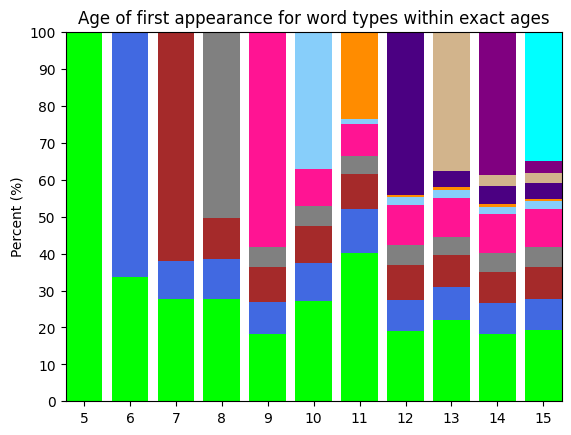

In [53]:
aoa_proportions_ages = getAoAInfo(dfs_ages, False, False)
test = [[aoa_proportions_ages[y][x] for x in range(5,16)] for y in aoa_proportions_ages]
for t in test:
    t.reverse()
y = np.column_stack(test)
x = range(5,16)


# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y * 100 
print(percent)
fig = plt.figure()
ax = fig.add_subplot(111)

totals = np.zeros(11)
for i in range(len(percent)-1, -1, -1):
    current = [y for y in percent[i]]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[::-1][i])
    totals = np.add(totals, current)


#ax.stackplot(x, percent, labels=PLOT_AGES[::-1], colors=PLOT_COLORS)
ax.set_title('Age of first appearance for word types within exact ages')
ax.set_ylabel('Percent (%)')
ax.margins(0, 0) # Set margins to avoid "whitespace"
ax.set_xticks(x)
ax.set_yticks(range(0,110,10))
#ax.legend(PLOT_AGES[::-1])
plt.show()

{'7-8': Counter({5: 2734653, 7: 131352, 6: 117739, 8: 81102}), '9-12': Counter({5: 6352339, 9: 316838, 6: 213841, 7: 177687, 12: 141377, 8: 108166, 10: 64864, 11: 17266}), '13+': Counter({5: 6023596, 6: 165618, 14: 141675, 7: 140885, 15: 118547, 13: 113949, 9: 109966, 8: 64990, 12: 44537, 10: 16972, 11: 7279})}
{'7-8': {5: 0.892, 6: 0.038, 7: 0.043, 8: 0.026}, '9-12': {5: 0.859, 6: 0.029, 7: 0.024, 8: 0.015, 9: 0.043, 10: 0.009, 11: 0.002, 12: 0.019}, '13+': {5: 0.867, 6: 0.024, 7: 0.02, 8: 0.009, 9: 0.016, 10: 0.002, 11: 0.001, 12: 0.006, 13: 0.016, 14: 0.02, 15: 0.017}}
{'7-8': {5: 0.892, 6: 0.038, 7: 0.043, 8: 0.026, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0}, '9-12': {5: 0.859, 6: 0.029, 7: 0.024, 8: 0.015, 9: 0.043, 10: 0.009, 11: 0.002, 12: 0.019, 13: 0.0, 14: 0.0, 15: 0.0}, '13+': {5: 0.867, 6: 0.024, 7: 0.02, 8: 0.009, 9: 0.016, 10: 0.002, 11: 0.001, 12: 0.006, 13: 0.016, 14: 0.02, 15: 0.017}}


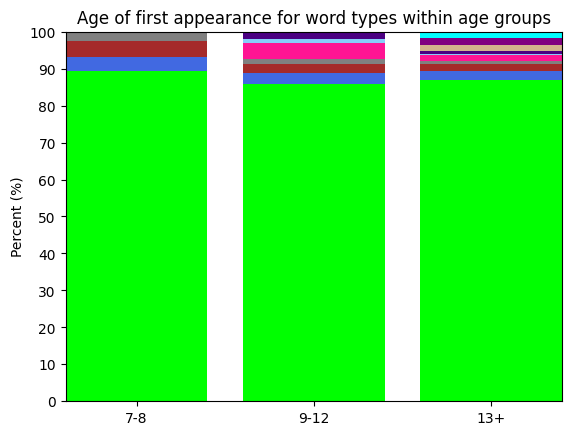

In [57]:
aoa_proportions_groups = getAoAInfo(dfs_groups, False, True)
test = [[aoa_proportions_groups[y][x] for x in range(5,16)] for y in aoa_proportions_groups]
#for t in test:
#    t.reverse()

y = np.column_stack(test)
x = range(0,3)

# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y /  y.sum(axis=0).astype(float) * 100 
fig = plt.figure()
ax = fig.add_subplot(111)
totals = np.zeros(len(x))
for i in range(len(percent)):
    current = [percent[i][y] for y in range(len(x))]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[i])
    totals = np.add(totals, current)


ax.set_title('Age of first appearance for word types within age groups')
ax.set_ylabel('Percent (%)')
ax.margins(0, 0) # Set margins to avoid "whitespace"
ax.set_xticks(x, labels=SHEET_NAMES_GROUPS)
ax.set_yticks(range(0,110,10))
plt.show()

{'Whole': Counter({5: 7540464, 6: 211879, 7: 203578, 9: 171215, 8: 110110, 12: 81627, 14: 60532, 15: 49808, 13: 49540, 10: 34773, 11: 11091})}
{'Whole': {5: 0.885, 6: 0.025, 7: 0.024, 8: 0.013, 9: 0.02, 10: 0.004, 11: 0.001, 12: 0.01, 13: 0.006, 14: 0.007, 15: 0.006}}
{'Whole': {5: 0.885, 6: 0.025, 7: 0.024, 8: 0.013, 9: 0.02, 10: 0.004, 11: 0.001, 12: 0.01, 13: 0.006, 14: 0.007, 15: 0.006}}


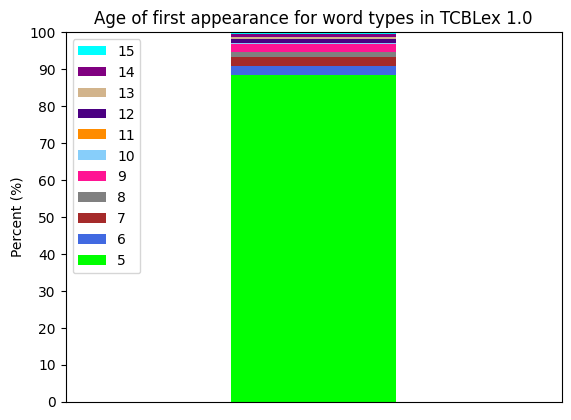

In [52]:
aoa_proportions_whole = getAoAInfo(dfs_whole, True, True)
test = [[aoa_proportions_whole[y][x] for x in range(5,16)] for y in aoa_proportions_whole]

y = np.column_stack(test)
x = range(0,1)

# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y /  y.sum(axis=0).astype(float) * 100 

fig = plt.figure()
ax = fig.add_subplot(111)

totals = np.zeros(len(x))
for i in range(len(percent)):
    current = [percent[i][0]]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[i], width=0.5)
    totals = np.add(totals, current)

ax.set_title('Age of first appearance for word types in TCBLex 1.0')
ax.set_ylabel('Percent (%)')
ax.margins(1, 0) # Set margins to avoid "whitespace"
ax.set_yticks(range(0,110,10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.legend(reverse=True, labels=PLOT_AGES, loc='upper left')
plt.show()

Zipf-values

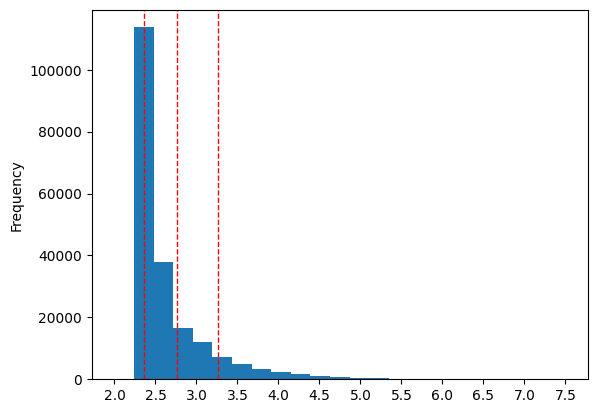

In [27]:
lemma_zipfs = dfs_whole['Whole'].drop_duplicates('lemma')['Lemma Zipf']

bins = np.linspace(2.5, 8 ,24) - 0.5
ax = lemma_zipfs.plot.hist(bins=bins)
ax.set_xticks(np.linspace(2.5, 8 ,12) - 0.5)
per_60 = np.percentile(lemma_zipfs.values, 50)
per_80 = np.percentile(lemma_zipfs.values, 75)
per_90 = np.percentile(lemma_zipfs.values, 90)
ax.axvline(per_60, color='r', linestyle='dashed', linewidth=1, label='50th Percentile')
ax.axvline(per_80, color='r', linestyle='dashed', linewidth=1, label='75th Percentile')
ax.axvline(per_90, color='r', linestyle='dashed', linewidth=1, label='90th Percentile')

548285
516595


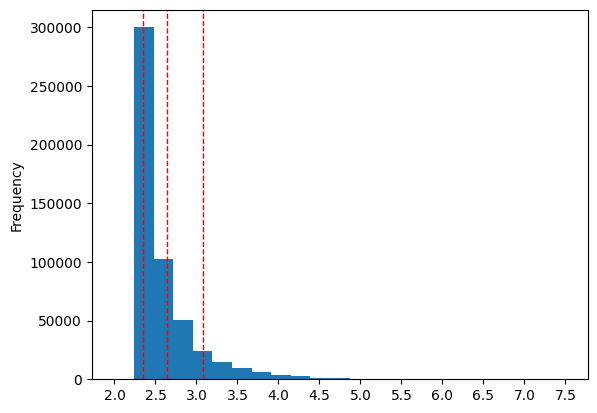

In [28]:
word_zipfs = dfs_whole['Whole'].drop_duplicates('text')['Word Zipf']

print(len(dfs_whole['Whole']))
print(len(dfs_whole['Whole'].drop_duplicates('text')))
bins = np.linspace(2.5, 8 ,24) - 0.5
ax = word_zipfs.plot.hist(bins=bins)
ax.set_xticks(np.linspace(2.5, 8 ,12) - 0.5)
per_60 = np.percentile(word_zipfs.values, 50)
per_80 = np.percentile(word_zipfs.values, 75)
per_90 = np.percentile(word_zipfs.values, 90)
ax.axvline(per_60, color='r', linestyle='dashed', linewidth=1, label='50th Percentile')
ax.axvline(per_80, color='r', linestyle='dashed', linewidth=1, label='75th Percentile')
ax.axvline(per_90, color='r', linestyle='dashed', linewidth=1, label='90th Percentile')